In [1]:
import os
import glob
import pandas as pd

data_root = "/kaggle/input/shl-intern-hiring-assessment-2025/dataset"
train_path = os.path.join(data_root, "csvs", "train.csv")
test_path = os.path.join(data_root, "csvs", "test.csv")

train_df = pd.read_csv(train_path)
test_df = pd.read_csv(test_path)

print("Train shape:", train_df.shape)
print("Test shape:", test_df.shape)

print("\nTrain columns:", train_df.columns.tolist())
print(train_df.head())

audio_train = glob.glob(os.path.join(data_root, "audios", "train", "*.wav"))
audio_test = glob.glob(os.path.join(data_root, "audios", "test", "*.wav"))

print("\nNumber of train audio files:", len(audio_train))
print("Number of test audio files:", len(audio_test))

print("\nSample train audio:\n", audio_train[:5])
print("\nSample test audio:\n", audio_test[:5])


Train shape: (409, 2)
Test shape: (197, 1)

Train columns: ['filename', 'label']
    filename  label
0  audio_173    3.0
1  audio_138    3.0
2  audio_127    2.0
3   audio_95    2.0
4   audio_73    3.5

Number of train audio files: 409
Number of test audio files: 197

Sample train audio:
 ['/kaggle/input/shl-intern-hiring-assessment-2025/dataset/audios/train/audio_49.wav', '/kaggle/input/shl-intern-hiring-assessment-2025/dataset/audios/train/audio_77_2.wav', '/kaggle/input/shl-intern-hiring-assessment-2025/dataset/audios/train/audio_90.wav', '/kaggle/input/shl-intern-hiring-assessment-2025/dataset/audios/train/audio_77.wav', '/kaggle/input/shl-intern-hiring-assessment-2025/dataset/audios/train/audio_66.wav']

Sample test audio:
 ['/kaggle/input/shl-intern-hiring-assessment-2025/dataset/audios/test/audio_49.wav', '/kaggle/input/shl-intern-hiring-assessment-2025/dataset/audios/test/audio_67_1.wav', '/kaggle/input/shl-intern-hiring-assessment-2025/dataset/audios/test/audio_90.wav', '/kaggl

In [2]:
!pip install -q transformers accelerate
!pip install -q git+https://github.com/openai/whisper.git

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 5.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 97.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 77.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 55.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 7.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 10.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 9.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 79.7 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
libcugraph-cu12 25.6.0 requi

In [3]:
import whisper
model = whisper.load_model("medium")

audio_train.sort()
sample_audio = audio_train[0]
print(sample_audio)

result = model.transcribe(sample_audio)
print("\nTRANSCRIPT:\n", result["text"])



100%|█████████████████████████████████████| 1.42G/1.42G [00:17<00:00, 88.8MiB/s]


/kaggle/input/shl-intern-hiring-assessment-2025/dataset/audios/train/audio_1.wav

TRANSCRIPT:
  People in the market are selling fish in the morning and a lot of meat because people go there to buy food for their restaurants. Before they start to cook they go there to collect the products they need. You can hear a lot of people shouting, they want bargain, so they speak enthusiastically to get them to the market to put their prices down. And you can see that in the morning there are a lot of people there and there's a change of scenery throughout today where there's gradually less people in the market. You can sense a lot of


In [4]:
import re
import numpy as np

text = result["text"].strip().lower()

sentences = re.split(r"[.!?]+", text)
sentences = [s.strip() for s in sentences if s.strip()]

words = re.findall(r"\b\w+\b", text)

print("Number of sentences:", len(sentences))
print("Number of words:", len(words))
print("First 3 sentences:", sentences[:3])

sentence_lengths = [len(s.split()) for s in sentences]

avg_sentence_length = np.mean(sentence_lengths) if sentence_lengths else 0
sentence_length_variance = np.var(sentence_lengths) if sentence_lengths else 0

fragments = [s for s in sentences if len(s.split()) < 5]
fragment_ratio = len(fragments) / len(sentences) if sentences else 0

print("Avg sentence length:", avg_sentence_length)
print("Sentence length variance:", sentence_length_variance)
print("Fragment ratio:", fragment_ratio)

unique_words = len(set(words))
word_count = len(words)

repetition_ratio = 1 - (unique_words / word_count) if word_count > 0 else 0

print("Word count:", word_count)
print("Unique words:", unique_words)
print("Repetition ratio:", repetition_ratio)

grammar_text_features = {
    "word_count": word_count,
    "avg_sentence_length": avg_sentence_length,
    "sentence_length_variance": sentence_length_variance,
    "fragment_ratio": fragment_ratio,
    "repetition_ratio": repetition_ratio
}

grammar_text_features = {
    "word_count": word_count,
    "avg_sentence_length": avg_sentence_length,
    "sentence_length_variance": sentence_length_variance,
    "fragment_ratio": fragment_ratio,
    "repetition_ratio": repetition_ratio
}

print(grammar_text_features)



Number of sentences: 5
Number of words: 104
First 3 sentences: ['people in the market are selling fish in the morning and a lot of meat because people go there to buy food for their restaurants', 'before they start to cook they go there to collect the products they need', 'you can hear a lot of people shouting, they want bargain, so they speak enthusiastically to get them to the market to put their prices down']
Avg sentence length: 20.4
Sentence length variance: 82.64
Fragment ratio: 0.0
Word count: 104
Unique words: 54
Repetition ratio: 0.4807692307692307
{'word_count': 104, 'avg_sentence_length': 20.4, 'sentence_length_variance': 82.64, 'fragment_ratio': 0.0, 'repetition_ratio': 0.4807692307692307}


In [5]:
import audioread

with audioread.audio_open(sample_audio) as f:
    duration = f.duration

word_count = grammar_text_features["word_count"]

wpm = (word_count / duration) * 60 if duration > 0 else 0

fluency_features = {
    "duration": duration,
    "wpm": wpm
}

print(fluency_features)


{'duration': 60.0, 'wpm': 104.0}


In [6]:
!pip install -q --force-reinstall \
numpy==1.26.4 \
scipy==1.11.4 \
scikit-learn==1.3.2 \
xgboost==1.7.6


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 2.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 kB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 83.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 36.4/36.4 MB 59.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.9/10.9 MB 116.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 200.3/200.3 MB 9.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 308.4/308.4 kB 23.4 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
bigframes 2.12.0 requires google-cloud-bigquery-storage<3.0.0,>=2.30.0, which is not installed.
datasets 4.4.1 requires pyarrow>=21.0.0, but you have pyarrow 19.0.1 which is incompatible.
preprocessing 0.1.13 requires nltk==3.2.4, but you have nltk 3.9.2 which is in

In [7]:
import os
import re
import audioread
import numpy as np
import pandas as pd
import whisper

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from scipy.stats import pearsonr
from xgboost import XGBRegressor



In [8]:
from sklearn.linear_model import Ridge
import torch
from tqdm import tqdm
print(torch.cuda.is_available())
print(torch.cuda.get_device_name(0))

data_root = "/kaggle/input/shl-intern-hiring-assessment-2025/dataset"
train_df = pd.read_csv(os.path.join(data_root, "csvs", "train.csv"))
audio_dir = os.path.join(data_root, "audios", "train")

asr_model = whisper.load_model("medium")

rows = []

for _, row in tqdm(train_df.iterrows(), total=len(train_df), desc="Processing train audio"):
    fname = row["filename"]
    label = row["label"]

    if not fname.endswith(".wav"):
        fname = fname + ".wav"

    audio_path = os.path.join(audio_dir, fname)
    if not os.path.exists(audio_path):
        continue

    with audioread.audio_open(audio_path) as f:
        duration = f.duration

    result = asr_model.transcribe(audio_path)
    text = result["text"].strip().lower()

    sentences = re.split(r"[.!?]+", text)
    sentences = [s.strip() for s in sentences if s.strip()]
    words = re.findall(r"\b\w+\b", text)

    word_count = len(words)
    sentence_count = len(sentences)

    sentence_lengths = [len(s.split()) for s in sentences] if sentences else [0]

    avg_sentence_length = np.mean(sentence_lengths)
    sentence_length_variance = np.var(sentence_lengths)

    fragments = [s for s in sentences if len(s.split()) < 5]
    fragment_ratio = len(fragments) / sentence_count if sentence_count > 0 else 0

    unique_words = len(set(words))
    repetition_ratio = 1 - (unique_words / word_count) if word_count > 0 else 0

    wpm = (word_count / duration) * 60 if duration > 0 else 0

    rows.append({
        "duration": duration,
        "wpm": wpm,
        "word_count": word_count,
        "avg_sentence_length": avg_sentence_length,
        "sentence_length_variance": sentence_length_variance,
        "fragment_ratio": fragment_ratio,
        "repetition_ratio": repetition_ratio,
        "label": label
    })

features_df = pd.DataFrame(rows)

X = features_df.drop(columns=["label"])
y = features_df["label"]

X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.2, random_state=42
)

model = Ridge(alpha=1.0)

model.fit(X_train, y_train)

val_preds = model.predict(X_val)
val_rmse = mean_squared_error(y_val, val_preds, squared=False)
val_pearson = pearsonr(y_val, val_preds)[0]

print("Validation RMSE:", val_rmse)
print("Validation Pearson:", val_pearson)

train_preds = model.predict(X)
train_rmse = mean_squared_error(y, train_preds, squared=False)
train_pearson = pearsonr(y, train_preds)[0]

print("Training RMSE:", train_rmse)
print("Training Pearson:", train_pearson)


True
Tesla T4


Processing train audio: 100%|██████████| 409/409 [50:37<00:00,  7.43s/it]

Validation RMSE: 0.74092793239075
Validation Pearson: 0.294674843484251
Training RMSE: 0.6844428836468115
Training Pearson: 0.45015814557233236


In [9]:
from tqdm import tqdm

test_df = pd.read_csv(os.path.join(data_root, "csvs", "test.csv"))
test_audio_dir = os.path.join(data_root, "audios", "test")
test_rows = []

for _, row in tqdm(test_df.iterrows(), total=len(test_df), desc="Processing test audio"):
    fname = row["filename"]

    if not fname.endswith(".wav"):
        fname += ".wav"

    audio_path = os.path.join(test_audio_dir, fname)
    if not os.path.exists(audio_path):
        continue

    with audioread.audio_open(audio_path) as f:
        duration = f.duration

    result = asr_model.transcribe(audio_path)
    text = result["text"].strip().lower()

    sentences = re.split(r"[.!?]+", text)
    sentences = [s.strip() for s in sentences if s.strip()]
    words = re.findall(r"\b\w+\b", text)

    word_count = len(words)
    sentence_lengths = [len(s.split()) for s in sentences] if sentences else [0]

    avg_sentence_length = np.mean(sentence_lengths)
    sentence_length_variance = np.var(sentence_lengths)

    fragments = [s for s in sentences if len(s.split()) < 5]
    fragment_ratio = len(fragments) / len(sentences) if sentences else 0

    repetition_ratio = 1 - (len(set(words)) / word_count) if word_count > 0 else 0
    wpm = (word_count / duration) * 60 if duration > 0 else 0

    test_rows.append({
        "filename": row["filename"],
        "duration": duration,
        "wpm": wpm,
        "word_count": word_count,
        "avg_sentence_length": avg_sentence_length,
        "sentence_length_variance": sentence_length_variance,
        "fragment_ratio": fragment_ratio,
        "repetition_ratio": repetition_ratio
    })

test_features_df = pd.DataFrame(test_rows)

X_test = test_features_df.drop(columns=["filename"])
test_preds = model.predict(X_test)

submission = pd.DataFrame({
    "filename": test_features_df["filename"],
    "label": test_preds
})

submission.to_csv("submission.csv", index=False)
print("submission.csv created successfully")



Processing test audio: 100%|██████████| 197/197 [20:47<00:00,  6.33s/it]

submission.csv created successfully


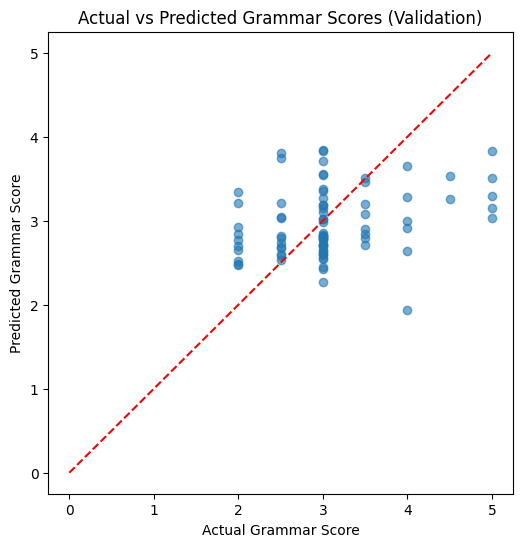

In [10]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6,6))
plt.scatter(y_val, val_preds, alpha=0.6)
plt.plot([0,5], [0,5], color="red", linestyle="--")
plt.xlabel("Actual Grammar Score")
plt.ylabel("Predicted Grammar Score")
plt.title("Actual vs Predicted Grammar Scores (Validation)")
plt.show()


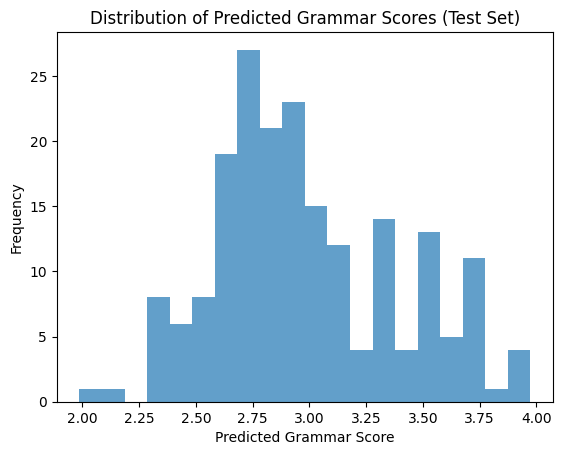

In [11]:
plt.hist(test_preds, bins=20, alpha=0.7)
plt.xlabel("Predicted Grammar Score")
plt.ylabel("Frequency")
plt.title("Distribution of Predicted Grammar Scores (Test Set)")
plt.show()
